# 2.2 小市值策略
小市值策略是一种因子选股策略。假设市值小的公司上涨的幅度大，反复调整持仓，选择n只市值最小的股票。

In [ ]:
def initialize(context):
    set_benchmark('000300.XSHG')
    set_option('use_real_price', True)
    set_order_cost(OrderCost(open_tax=0, close_tax=0.001, open_commission=0.0003,\
                             close_commission=0.0003, close_today_commission=0, min_commission=5),type='stock')
    
    g.security = get_index_stocks('000300.XSHG')
   
    g.q = query(valuation).filter(valuation.code.in_(g.security))
    g.N = 30 # 选市值最小的30只股票
    run_monthly(handle,1) # 自带的每月运行一次的函数
    
def handle(context):
    # 需要查询财务数据
    df = get_fundamentals(g.q)[['code','market_cap']]
    # 注意Pandas库的版本号
    df = df.sort_values('market_cap').iloc[:g.N,:]
    
    to_hold = df['code'].values
    
    for stock in context.portfolio.positions:
        if stock not in to_hold:
            order_target(stock,0)
    
    to_buy = [stock for stock in to_hold if stock not in context.portfolio.positions]
    
    if len(to_buy)>0:
        cash_per_stock = context.portfolio.available_cash / len(to_buy)
        for stock in to_buy:
            order_value(stock, cash_per_stock)


In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

import numpy as np
import pandas as pd
data = pd.read_csv('/data/result/2.2小市值策略.csv',encoding = 'ansi')
data.head()

,时间,基准收益,策略收益,当日盈利,当日亏损,当日买入,当日卖出,超额收益(%)
0,2020-01-02 16:00:00,1.36,0.31,305.0,0.0,83811,0,-1.04
1,2020-01-03 16:00:00,1.18,0.76,451.0,0.0,0,0,-0.42
2,2020-01-06 16:00:00,0.80,1.27,516.0,0.0,0,0,0.47
3,2020-01-07 16:00:00,1.55,2.23,957.0,0.0,0,0,0.67
4,2020-01-08 16:00:00,0.38,1.14,0.0,-1091.0,0,0,0.76


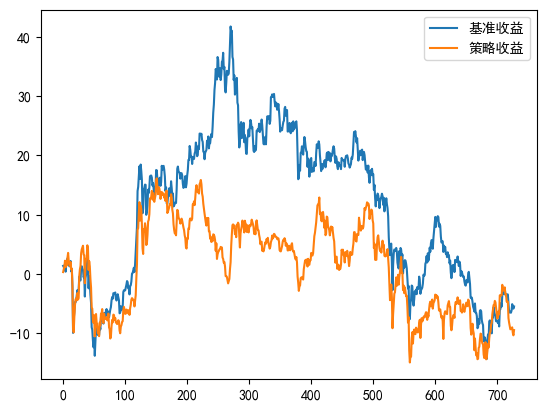

In [2]:
data[['基准收益', '策略收益']].plot()
plt.show()